# Mapper Graphs of Credit Card Fraud

In this notebook we generate graphs of the processed credit card data. The graphs are the output of the Mapper algorithm introduced in [(Singh et al.)](https://research.math.osu.edu/tgda/mapperPBG.pdf). 

We use the [Keppler Mapper](https://kepler-mapper.scikit-tda.org/en/latest/#) library and experiment with several filter (lens) functions to uncover connections between fraud transactions.

In [25]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import kmapper as km
from kmapper.plotlyviz import *
from kmapper import jupyter
import networkx as nx

SEED = 17

# Load Data

The data sets below are available [here](https://drive.google.com/drive/folders/15XJHTRwR4mKfer56sdXnGK48KdqIG5UG?usp=sharing).

In [7]:
#original data set
data = pd.read_csv('creditcardfraud_normalised.csv')
y = data['Class'].values
X = data.drop(columns = 'Class')


#pc which explain 80% of variance
pc = pd.read_csv('credit_pc.csv')
pc.drop(columns = ['Unnamed: 0', 'fraud'], inplace = True)

# Non-machine learning filters

## Principal components filter

In [12]:
pc1_filter = np.array([[i] for i in pc.PC1])
pc2_filter = np.array([[i] for i in pc.PC2])

In [14]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#define the filter
pc_filter = np.c_[pc1_filter, pc2_filter]

# Define the simplicial complex using different parameters
graph = mapper.map(pc1_filter,
                   X,
                   cover = km.Cover(n_cubes=100, perc_overlap=0.7),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                       random_state=SEED ))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= y,
                        color_function_name = 'fraud',
                        node_color_function = ['min','max', 'median', 'average'], 
                        path_html="CreditCardMapper.html",
                        title="CreditCardMapper")

# Inline display
jupyter.display(path_html="CreditCardMapper.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## $L_2$ norm filter

In [22]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#define the filter
lens = mapper.fit_transform(X, projection = "l2norm")

# Define the simplicial complex using different parameters
graph = mapper.map(lens,
                   X,
                   cover = km.Cover(n_cubes=20, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                       random_state=SEED ))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= y,
                        color_function_name = 'fraud',
                        node_color_function = ['min','max', 'median', 'average'], 
                        path_html="CreditCardMapper.html",
                        title="CreditCardMapper")

# Inline display
jupyter.display(path_html="CreditCardMapper.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


We can investigate 'cube5_cluster2' which has a mix of fraud and non-fraud transactions.

In [169]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [23]:
cube13_cluster2 = graph['nodes']['cube5_cluster2']

In [26]:
cube13_cluster2_df = data.iloc[cube13_cluster2]

In [28]:
cube13_cluster2_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4920,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,0.477162,...,0.556737,0.466535,0.667999,0.370467,0.569143,0.336811,0.417241,0.310018,0.009339,1.0
6609,0.927999,0.803163,0.771171,0.368311,0.752411,0.235555,0.244456,0.800545,0.436016,0.380449,...,0.568799,0.483089,0.666116,0.444448,0.580385,0.475385,0.426312,0.318070,0.000039,1.0
6717,0.927488,0.819149,0.734722,0.504673,0.773824,0.232504,0.254917,0.791406,0.332002,0.354484,...,0.571404,0.491071,0.654488,0.344553,0.640032,0.478354,0.433026,0.324681,0.000039,1.0
6820,0.921429,0.805662,0.759288,0.372978,0.751426,0.239483,0.239554,0.803659,0.417815,0.369756,...,0.571879,0.486541,0.665426,0.391895,0.583071,0.475841,0.426711,0.319191,0.000039,1.0
6870,0.926631,0.803583,0.759985,0.376288,0.751455,0.239571,0.239396,0.803639,0.413195,0.363897,...,0.572247,0.485948,0.665252,0.391749,0.581191,0.475250,0.424227,0.317362,0.000039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277737,0.845667,0.797568,0.753925,0.287354,0.746580,0.243501,0.237272,0.808240,0.408263,0.437964,...,0.592162,0.535742,0.656205,0.393935,0.591036,0.383599,0.382147,0.318426,0.000039,0.0
277772,0.846237,0.802111,0.733550,0.302870,0.740491,0.245485,0.237300,0.812288,0.413593,0.445117,...,0.593804,0.556849,0.673298,0.388314,0.543167,0.370790,0.384042,0.320375,0.000077,0.0
277877,0.836857,0.806776,0.725472,0.302041,0.738028,0.244817,0.235059,0.816971,0.414386,0.446900,...,0.593938,0.555325,0.674061,0.387800,0.547259,0.371969,0.383762,0.320293,0.000077,0.0
279863,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,0.393113,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1.0


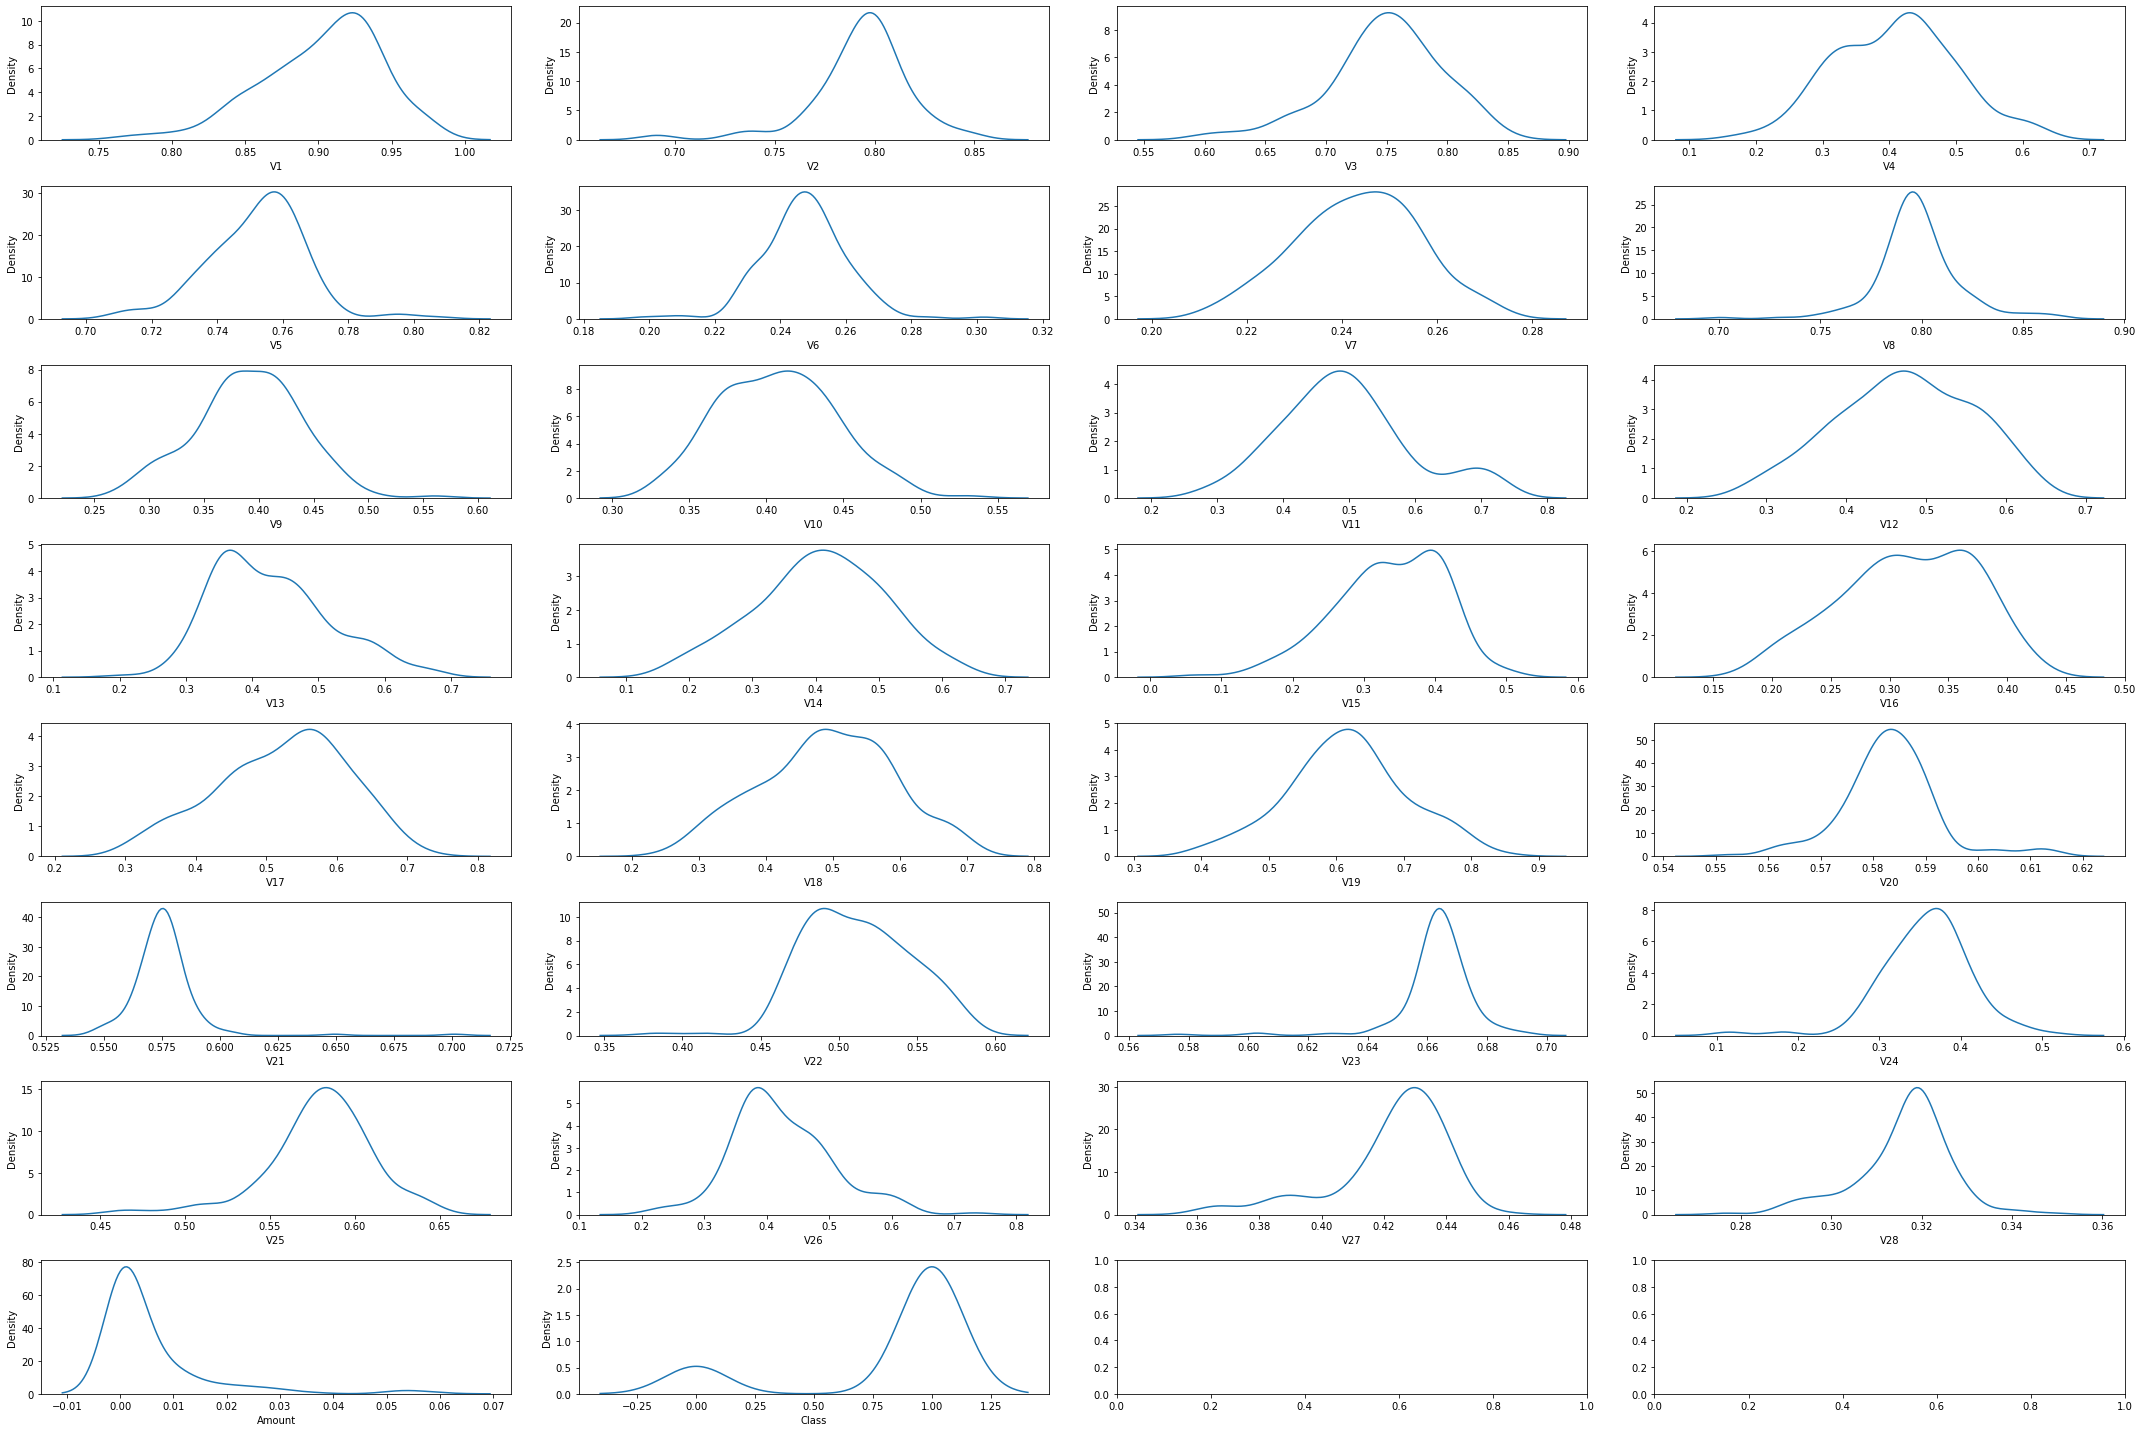

In [30]:
fig, axes = plt.subplots(8, 4, figsize=(30, 20))
axes = axes.flatten()

for ax,i in zip(axes, cube13_cluster2_df.columns):
    sns.kdeplot(data= cube13_cluster2_df[i], ax=ax)
    
plt.tight_layout()
plt.show()

## Knn_distance filter

This filter is suggested in the [Keppler Mapper documentation](https://kepler-mapper.scikit-tda.org/en/latest/applications.html) but it's very slow.

In [31]:
#initiate the mapper object
#mapper = km.KeplerMapper(verbose = 0)

#define the filter
#lens = mapper.fit_transform(X, projection = "knn_distance_5")

#lens2 = np.c_[lens, pc1_lens]
# Define the simplicial complex using different parameters. Note that
#graph = mapper.map(lens,X,cover = km.Cover(n_cubes=10, perc_overlap=0.7),clusterer=sklearn.cluster.KMeans(n_clusters=3, random_state=SEED ))

# Visualize it
#html = mapper.visualize(graph, 
#                        color_values= y,
#                        color_function_name = 'fraud',
#                        node_color_function = ['min','max', 'median', 'average'], 
#                        path_html="CreditCardMapper.html",
#                        title="CreditCardMapper")

# Inline display
#jupyter.display(path_html="CreditCardMapper.html")

# Machine Learning Filters

## Isolation Forest Score

In [32]:
from sklearn import ensemble

In [33]:
# Create a custom 1-D lens with Isolation Forest
iso_forest = ensemble.IsolationForest(bootstrap=True, n_estimators=100, contamination='auto',random_state=SEED)
iso_forest.fit(X)
#Anomaly score filter (lower is more abnormal)
iso_filter = iso_forest.score_samples(X).reshape((X.shape[0], 1))

In [34]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

# Define the simplicial complex using different parameters
graph = mapper.map(iso_filter,
                   X,
                   cover = km.Cover(n_cubes=30, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=5,
                                                       random_state=SEED ))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= y,
                        color_function_name = 'fraud',
                        node_color_function = ['max', 'min', 'median', 'average'], 
                        path_html="CreditCardMapper.html",
                        title="CreditCardMapper")

# Inline display
jupyter.display(path_html="CreditCardMapper.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,stratify=y,random_state=SEED)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_test_pred=logreg.predict(x_test)

In [40]:
from sklearn.metrics import recall_score

In [41]:
recall_score(y_test,y_test_pred)

0.5714285714285714

In [42]:
#filter with the log-regression probability of being fraud
logreg_filter = np.array([[i] for i in logreg.predict_proba(X)[:,1]])

In [43]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

# Define the simplicial complex using different parameters
graph = mapper.map(logreg_filter,
                   X,
                   cover = km.Cover(n_cubes=35, perc_overlap=0.6),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                       random_state=SEED ))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= y,
                        color_function_name = 'fraud',
                        node_color_function = ['min', 'max', 'median', 'average'], 
                        path_html="CreditCardMapper.html",
                        title="CreditCardMapper")

# Inline display
jupyter.display(path_html="CreditCardMapper.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [50]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=SEED, n_jobs=-1, class_weight="balanced")
# Train model
random_forest = clf.fit(X_train, y_train)

In [52]:
y_test_pred = random_forest.predict(X_test)

In [53]:
from sklearn.metrics import recall_score

In [54]:
recall_score(y_test,y_test_pred)

0.7142857142857143

In [55]:
rf_filter = random_forest.predict_proba(X)[:,1].reshape((X.shape[0], 1))

In [56]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)


# Define the simplicial complex using different parameters
graph = mapper.map(rf_filter,
                   X,
                   cover = km.Cover(n_cubes=20, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                       random_state=SEED ))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= y,
                        color_function_name = 'fraud',
                        node_color_function = ['min', 'max', 'median', 'average'], 
                        path_html="CreditCardMapper.html",
                        title="CreditCardMapper")

# Inline display
jupyter.display(path_html="CreditCardMapper.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
